In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['amazon_alexa.tsv']


In [2]:
data=pd.read_csv("../input/amazon_alexa.tsv",sep="\t")#reading the Tab Seperated file
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
data.groupby("rating").describe() #Number of Counts for each reading

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [4]:
data_c=data
data=data[data.rating!=5]
data=data[data.rating!=4]
data.groupby("rating").describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [5]:
data["index"]=range(0,409)
data=data.set_index("index")
data.head()

,rating,date,variation,verified_reviews,feedback
index,,,,,
0,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
1,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
2,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
3,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
4,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [7]:
sw=set(stopwords.words("english"))  #Using the stopword dictionary to clearing out the stopword from the reviews
c=[]
for i in range(0,409):
    review=re.sub('[^a-zA-Z]',' ',data['verified_reviews'][i])
    review=review.lower()
    review=review.split()
    st=PorterStemmer()
    review=[st.stem(token) for token in review if not token in sw]
    review=' '.join(review)
    c.append(review)

In [8]:
word=[]
for i in range(0,len(c)):
    word+=(re.findall(r"\w+",c[i]))

In [9]:
from collections import Counter
word_count=Counter(word) # counting the occurence of the each word
word_count=sorted(word_count.items(),key=lambda x:x[1],reverse=True)

In [10]:
word_list=[]
count=[]
for x,y in word_count:
    word_list.append(x)
    count.append(y)

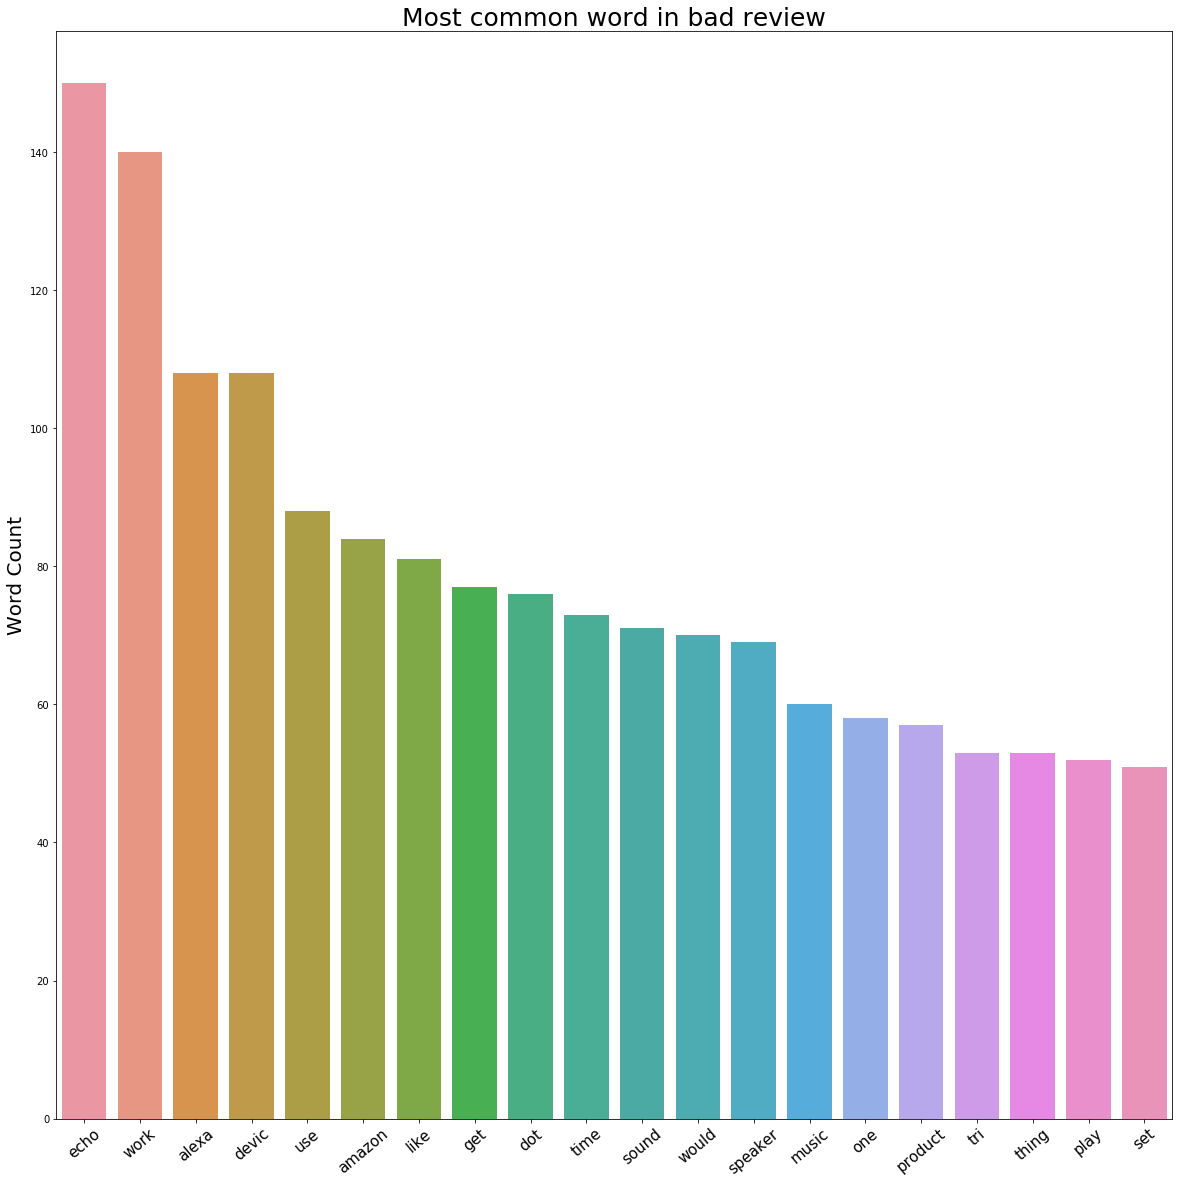

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
plot=sns.barplot(np.arange(20),count[:20])
plt.ylabel("Word Count",fontsize=20)
plt.xticks(np.arange(20),word_list[:20],fontsize=15,rotation=40)
plt.title("Most common word in bad review",fontsize=25)
plt.show() # The occurence of the sound and speaker occurs the most in bad review and then there are some general word such as echo, dot, work, alexa, and amazon 

In [12]:
data=data_c
data=data[data.rating!=3]
data=data[data.rating!=2]
data=data[data.rating!=1]
data.rating.value_counts() # performing the Similar process as above but for the rating with 4 and 5

5    2286
4     455
Name: rating, dtype: int64

In [13]:
data["index"]=range(0,2741)
data=data.set_index("index")
data.head(5)

,rating,date,variation,verified_reviews,feedback
index,,,,,
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [14]:
c1=[]
for i in range(0,2741):
    review=re.sub("[^a-zA-Z]"," ",data["verified_reviews"][i])
    review=review.lower()
    review=review.split()
    st=PorterStemmer()
    review=[st.stem(token) for token in review if token not in sw]
    review=" ".join(review)
    c1.append(review)

In [15]:
word=[]
for i in range(0,len(c1)):
    word+=(re.findall("\w+",c1[i]))

In [16]:
w_c=Counter(word)
w_c=sorted(w_c.items(),key=lambda x :x[1],reverse=True)
word=[]
count=[]
for x,y in w_c:
    word.append(x)
    count.append(y)

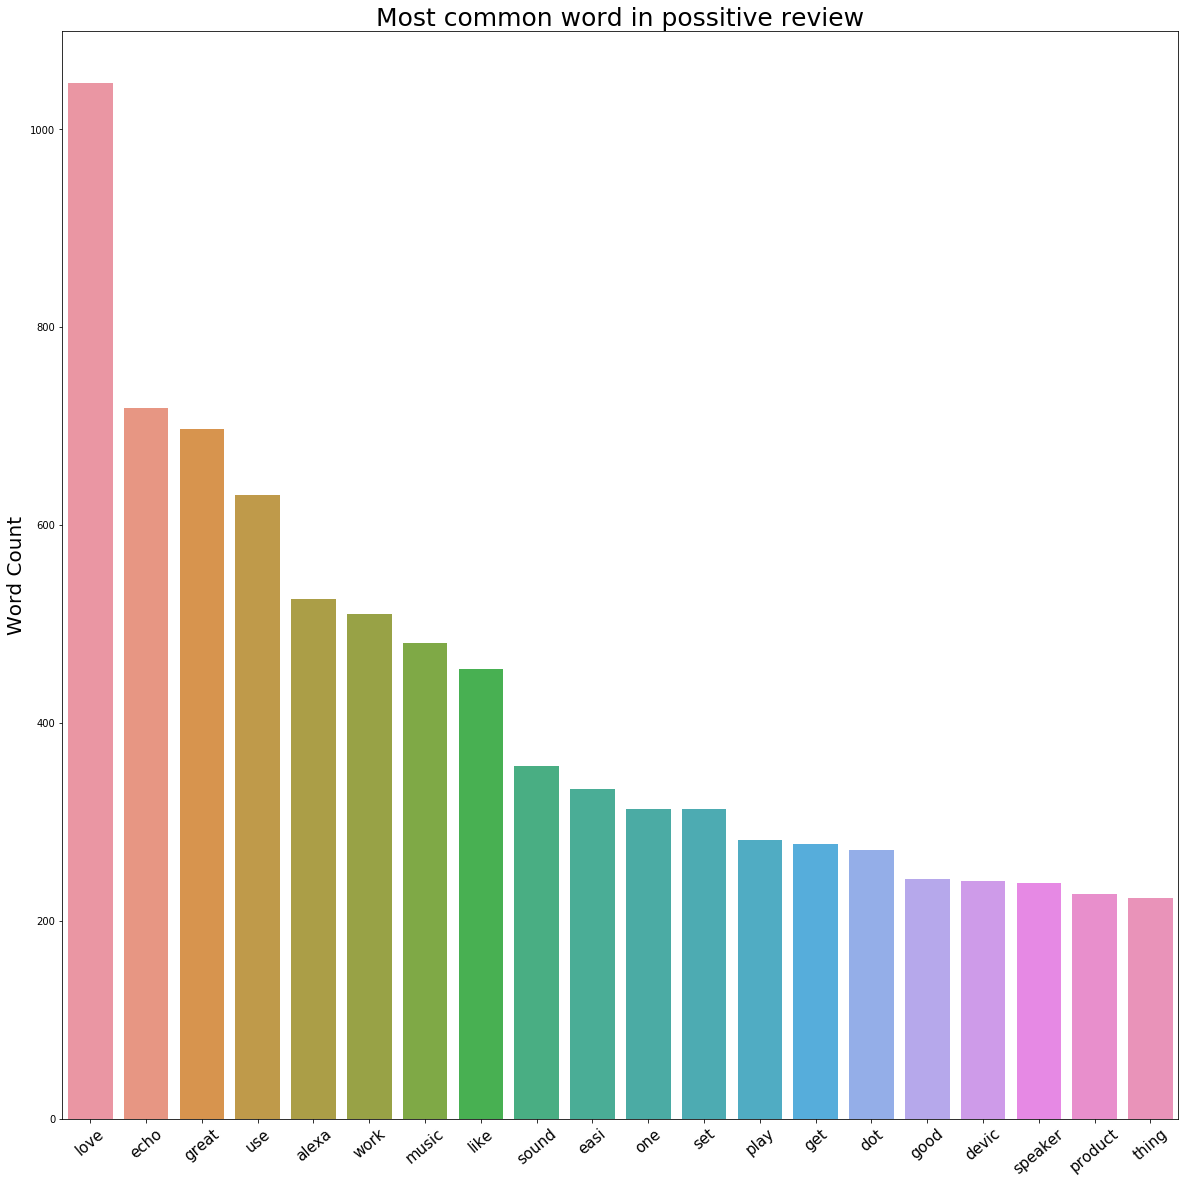

In [17]:
plt.figure(figsize=(20,20))
plot=sns.barplot(np.arange(20),count[:20])
plt.ylabel("Word Count",fontsize=20)
plt.xticks(np.arange(20),word[:20],fontsize=15,rotation=40)
plt.title("Most common word in possitive review",fontsize=25)
plt.show() # It shows the maximum word was love which shows the product with ratings 4 and 5 have liked the product